In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
import pandas as pd
data = pd.read_csv("spotify_tracks.csv")

In [ ]:
import os

print("Current working directory:", os.getcwd())

Current working directory: /content


In [ ]:
import pandas as pd

data = pd.read_csv("spotify_tracks.csv")

In [ ]:
#Question 1

In [ ]:
#plot distribution

In [ ]:
#remove unnamed:0
data = data[['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

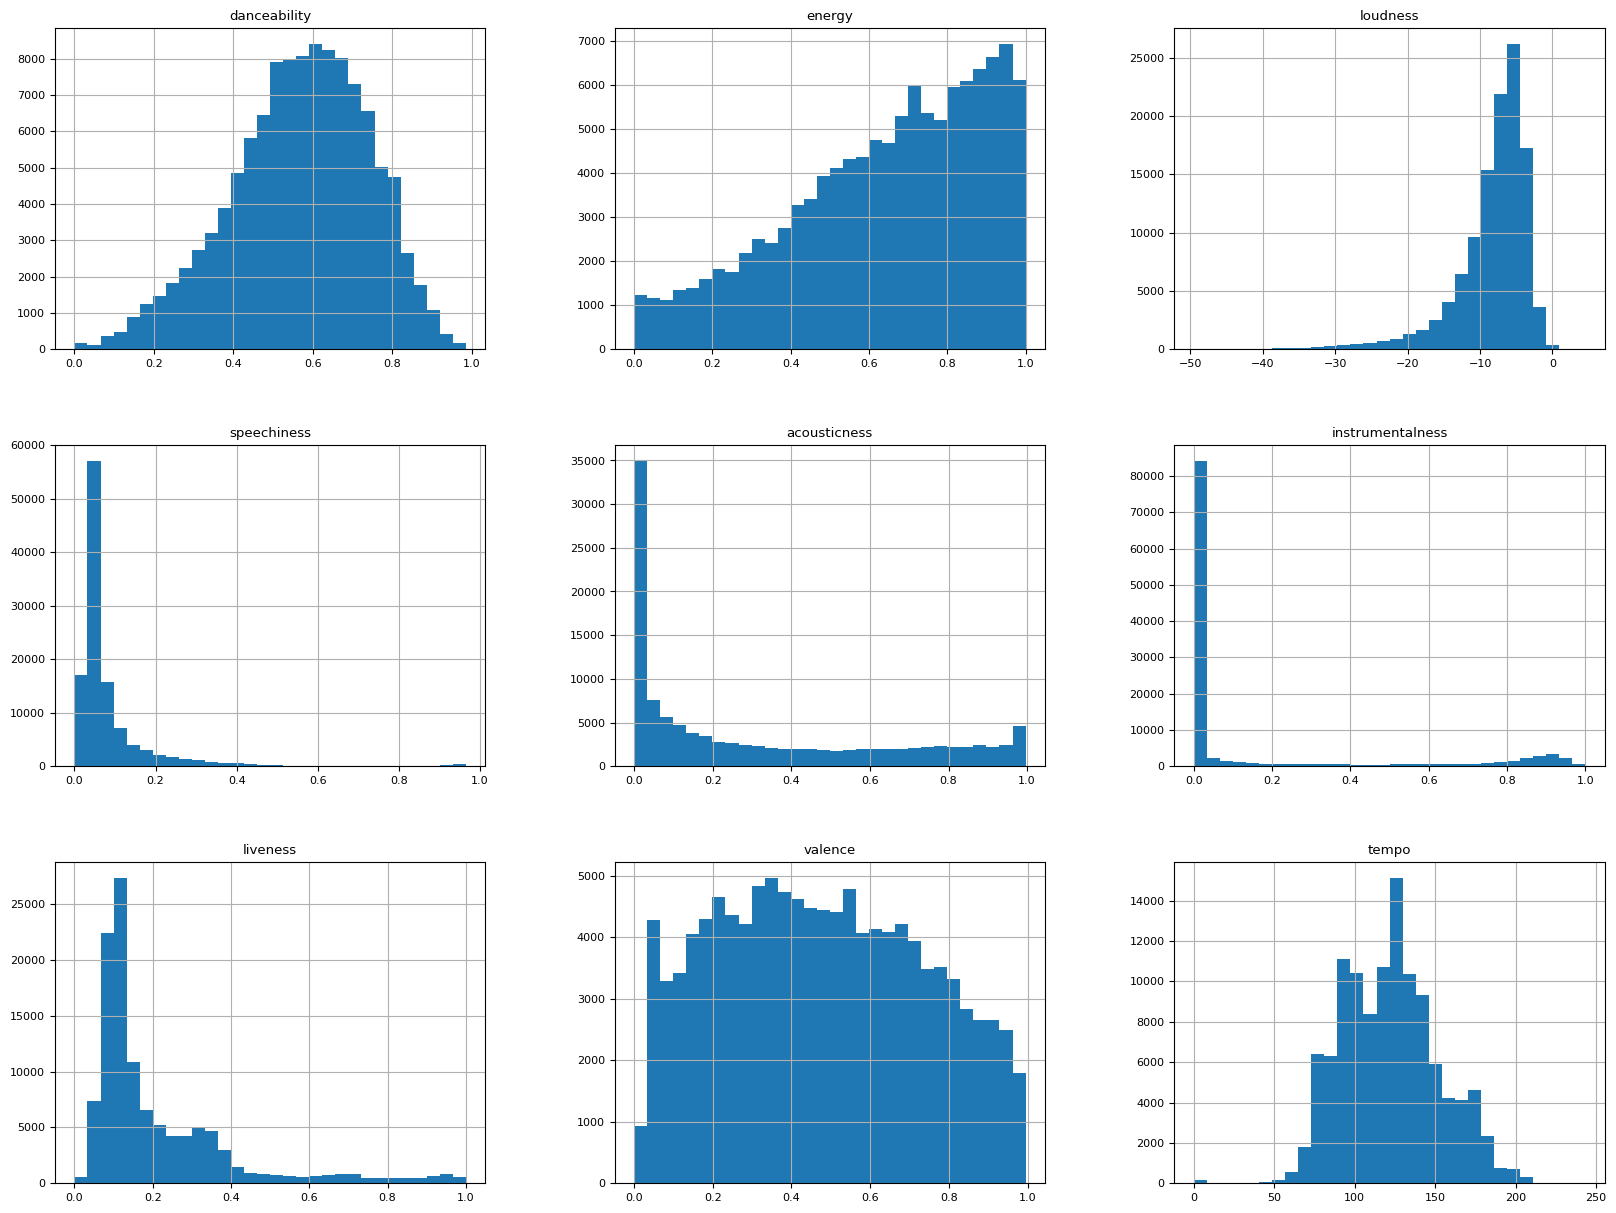

In [ ]:
data.hist(bins = 30, figsize = (20, 15))

In [ ]:
# corr matrix
corr_matrix = data.select_dtypes(include = ['number']).corr()

print(corr_matrix)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.134325  0.259077     0.108626     -0.171533   
energy                0.134325  1.000000  0.761690     0.142509     -0.733906   
loudness              0.259077  0.761690  1.000000     0.060826     -0.589803   
speechiness           0.108626  0.142509  0.060826     1.000000     -0.002186   
acousticness         -0.171533 -0.733906 -0.589803    -0.002186      1.000000   
instrumentalness     -0.185606 -0.181879 -0.433477    -0.089616      0.104027   
liveness             -0.131617  0.184796  0.076899     0.205219     -0.020700   
valence               0.477341  0.258934  0.279848     0.036635     -0.107070   
tempo                -0.050450  0.247851  0.212446     0.017273     -0.208224   

                  instrumentalness  liveness   valence     tempo  
danceability             -0.185606 -0.131617  0.477341 -0.050450  
energy                   -0.181879  0.184796  0.258934 

In [ ]:
# Decrease font size
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 8

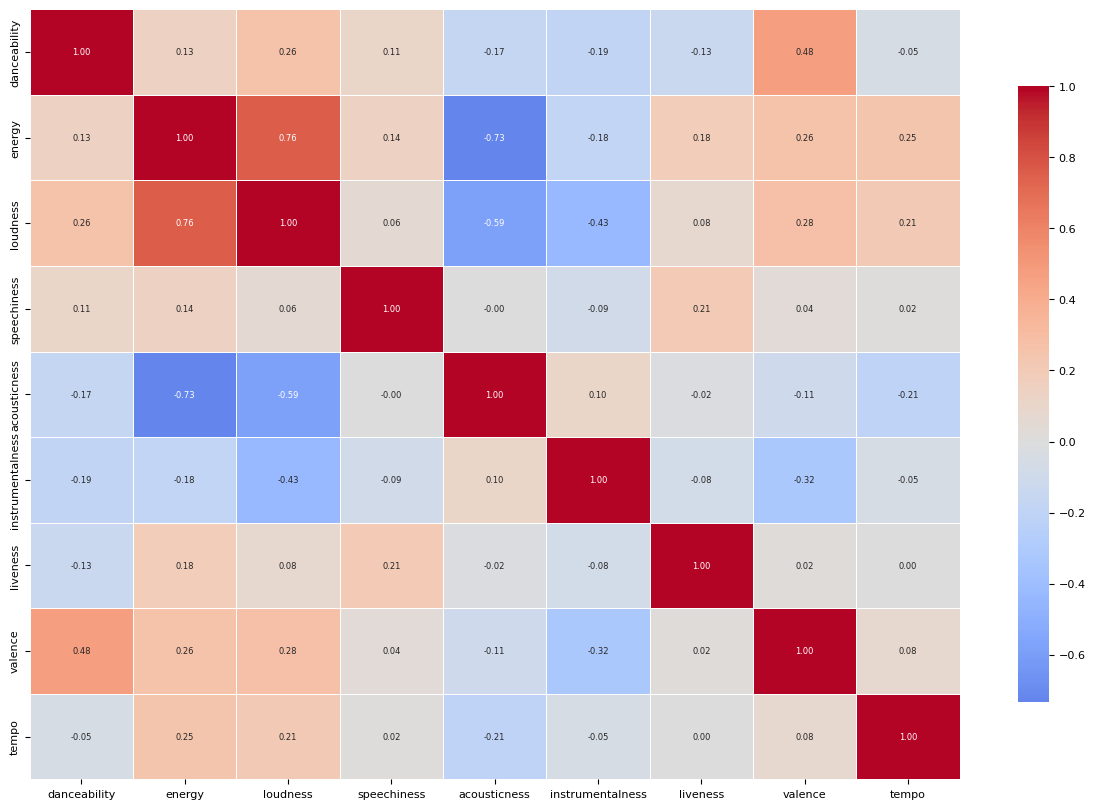

In [ ]:
# PLOT THE HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,
            annot = True,
            fmt = ".2f",
            cmap = 'coolwarm',
            center=0,
            linewidths=0.5,
            linecolor='white',
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 6})
plt.show()

In [ ]:
#Question 2

In [ ]:
#z-score
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
data = pd.read_csv("spotify_tracks.csv")

def remove_outliers(data, columns, threshold = 3):
    df_clean = data.copy()
    z_score = stats.zscore(df_clean[columns])
    abs_zscore = np.abs(z_score)
    filtered_entries = (abs_zscore < threshold).all(axis=1)
    return df_clean[filtered_entries]

# Select relevant audio features and redefine data
data = data[['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Select relevant audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Remove outliers
df_clean = remove_outliers(data, audio_features, threshold=3)
print(f"Original size: {len(data)} | Cleaned size: {len(df_clean)}")

Original size: 114000 | Cleaned size: 106251


In [ ]:
#Clustering algorithm comparison
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
#import time

In [ ]:
import pandas as pd
df_clean = pd.read_csv("spotify_tracks.csv")
from sklearn.preprocessing import StandardScaler
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
X = scaler.fit_transform(df_clean[audio_features])

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
# Compute DBSCAN metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_clean[audio_features])

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_noise = list(dbscan_labels).count(-1)

print("DBSCAN Clusters:", dbscan_clusters)
print("Noise Points:", dbscan_noise)


DBSCAN Clusters: 11
Noise Points: 568


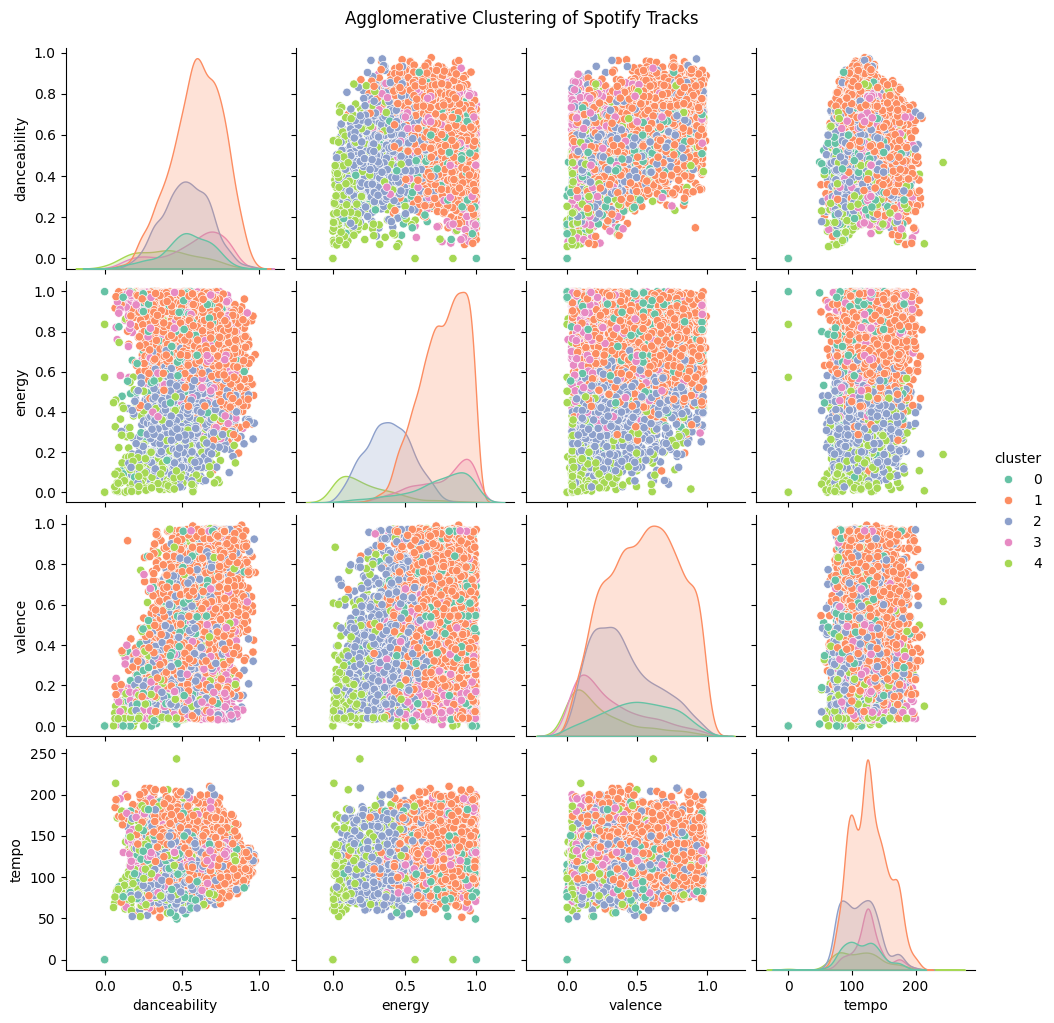

In [ ]:
# Agglomerative Clustering

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_tracks.csv")

audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

df_sample = df.sample(n=5000, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(df_sample[audio_features])

agg = AgglomerativeClustering(n_clusters=5)
df_sample['cluster'] = agg.fit_predict(X)

sns.pairplot(df_sample, vars=['danceability', 'energy', 'valence', 'tempo'],
             hue='cluster', palette='Set2')
plt.suptitle("Agglomerative Clustering of Spotify Tracks", y=1.02)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering

df = pd.read_csv('spotify_tracks.csv')
df_sample = df.sample(n=5000, random_state=42)
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
X = scaler.fit_transform(df_sample[audio_features])

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X)

dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
agg_clusters = len(set(agg_labels))

print("DBSCAN Clusters:", dbscan_clusters)
print("Agglomerative Clusters:", agg_clusters)


DBSCAN Clusters: 4
Agglomerative Clusters: 5


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv('spotify_tracks.csv')
df_sample = df.sample(n=5000, random_state=42)

audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
X = scaler.fit_transform(df_sample[audio_features])

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X)

dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
agg_clusters = len(set(agg_labels))

print("DBSCAN Results:")
print(f"Clusters: {dbscan_clusters}, Noise Points: {list(dbscan_labels).count(-1)}")
print(f"Silhouette Score: {silhouette_score(X, dbscan_labels):.4f}")

print("\nAgglomerative Results:")
print(f"Clusters: {agg_clusters}")
print(f"Silhouette Score: {silhouette_score(X, agg_labels):.4f}")


DBSCAN Results:
Clusters: 4, Noise Points: 231
Silhouette Score: 0.1433

Agglomerative Results:
Clusters: 5
Silhouette Score: 0.1932


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

dbscan_core_samples = np.array(dbscan_labels) != -1
if len(set(dbscan_labels[dbscan_core_samples])) > 1:
    dbscan_score = silhouette_score(X[dbscan_core_samples], dbscan_labels[dbscan_core_samples])
else:
    dbscan_score = None

agg_score = silhouette_score(X, agg_labels)

print("DBSCAN Results:")
print(f"Clusters: {dbscan_clusters}, Noise Points: {list(dbscan_labels).count(-1)}")
print(f"Silhouette Score: {dbscan_score:.4f}" if dbscan_score else "Silhouette Score: Not Applicable")

print("\nAgglomerative Results:")
print(f"Clusters: {agg_clusters}")
print(f"Silhouette Score: {agg_score:.4f}")


DBSCAN Results:
Clusters: 4, Noise Points: 231
Silhouette Score: 0.1660

Agglomerative Results:
Clusters: 5
Silhouette Score: 0.1932


In [ ]:
favorite_songs = input("Enter your favorite song names separated by commas: ").split(',')
favorite_songs = [song.strip().lower() for song in favorite_songs]

audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[audio_features])

df['cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(X_scaled)

favorite_indices = df[df['track_name'].str.lower().isin(favorite_songs)].index
favorite_clusters = df.loc[favorite_indices, 'cluster'].value_counts().index.tolist()

recommendations = df[df['cluster'].isin(favorite_clusters) & ~df['track_name'].str.lower().isin(favorite_songs)]
recommendations = recommendations.sample(n=5, random_state=42)

print("Recommended Songs:")
print(recommendations[['track_name', 'artists']])

feedback = []
for _, row in recommendations.iterrows():
    print(f"\nTrack: {row['track_name']} by {row['artists']}")
    rating = input("Did you like this recommendation? (yes/no): ").strip().lower()
    feedback.append({'track': row['track_name'], 'liked': rating == 'yes'})

liked = [f['track'] for f in feedback if f['liked']]
disliked = [f['track'] for f in feedback if not f['liked']]

print("\nSongs you liked:")
print(liked if liked else "None")

print("\nSongs you disliked:")
print(disliked if disliked else "None")


**Part 1**

Using the heatmap, many correlations between different features were seen. For instance, it appears that the energy of a song is positively correlated with its loudness–a correlation of 0.76. This means that louder songs would be expected to bring forth more energy, and vice versa. On the other hand, energy and acousticness have a strong negative correlation–a correlation of -0.73.
This signifies that if a song has a lot of energy, it probably does not consist of acousticness, and vice versa. With a correlation of -0.00 between speechiness and time_signature, this suggests that there is a weak correlation–basically none–between the two variables. The same goes for tempo and liveness, with a correlation of 0.00.

Based on the entire dataset, it would seem appropriate to add a few more variables, because it appears that many variables added do not have a strong positive or negative correlation with each other, with a majority of negatives–yet still quite weak. For example, it would benefit from adding variables such as user interaction metrics: skips, saves, playlist adds, and so on. Furthermore, the date or decade of release and genre may be suitable as well.

**Part 2**

In order to improve the performance of clustering algorithms, outliers were removed using the Z-score method because such an approach measures how far a data point is from the mean in terms of standard deviations. Furthermore, a threshold of +-3 was utilized, which signifies that any value more than 3 standard deviations from the mean was considered an outlier and removed. Outliers were removed since they can distort distance-based models like KMeans, which would result in poor clustering.

After cleaning the data, two clustering algorithms were tested: DBSCAN and Agglomerative Clustering. Because the full dataset resulted in slow or no loading in certain cells, a random sample of 5000 was taken for the measurements. To evaluate each algorithm’s performance, a silhouette score was used. Regarding DBSCAN, four clusters were created with 231 noise points and a silhouette score of around 0.14-0.16. For Agglomerative Clustering, five clusters were created with a silhouette score of around 0.19. From the data, it appears that Agglomerative Clustering performed the best with the highest silhouette score.

In order to select the optimal number of clusters, two methods were utilized. One of which was the Elbow Method, which plots the sum of squared distances for various values of k. The “elbow” point suggests the optimal k. Next, a silhouette analysis was utilized, in which silhouette scores for different k values were plotted. The peak of the graph indicates the most natural number of clusters.

**Part 3**

We enhanced the recommendation system to accept multiple favorite songs as input instead of a single track, recommend songs from similar clusters utilizing audio features and KMeans grouping, and we incorporated a user feedback system by prompting for a yes/no response following each recommendation. Such a feedback mechanism can be used to refine recommendations, prioritize certain clusters, and train a personalized model for each user.



In [ ]:
#  Innovation

In [4]:
!pip install streamlit
!pip install pyngrok

In [5]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd

df = pd.read_csv("spotify_tracks.csv")

st.title("Song Recommender Engine")
st.write("Choose your facorite songs to get recommendations")

favorites = st.multiselect("Select favorite songs:", df['track_name'].unique())

if favorites:
  st.write("You selected:", favorites)
  st.write("Recommended songs:")
  recs = df.sample(5)
  st.dataframe(recs[['track_name', 'artists', 'popularity']])

  feedback = st.radio("Did you like the recommendations?", ["Yes", "No"])
  if st.button("Submit Feedback"):
    st.success(f"Thanks for your feedback: {feedback}")

Writing streamlit_app.py


In [6]:
from pyngrok import ngrok

!pkill streamlit
public_url = ngrok.connect(port=8501)
print("Streamlit app URL:", public_url)

!streamlit run streamlit_app.py &

ERROR:pyngrok.process.ngrok:t=2025-07-16T17:23:20+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-16T17:23:20+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-16T17:23:20+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.